In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob

In [2]:
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',250)

In [3]:
holiday = pd.read_csv('./subway/holiday.csv', encoding='cp949')
holiday['날짜1'] = pd.to_datetime(holiday['날짜1'])
holiday


날짜1   휴일명
0    1949-01-01    신정
1    1949-01-02    신정
2    1949-01-03    신정
3    1949-03-01  3·1절
4    1949-04-05   식목일
...         ...   ...
3711 2200-09-23    추석
3712 2200-09-24    추석
3713 2200-10-03   개천절
3714 2200-10-09   한글날
3715 2200-12-25   성탄절

[3716 rows x 2 columns]

In [4]:
all_subway = glob.glob(os.path.join('./subway/', '* 20* *.csv'))

hosun = {f'{i}호선':i  for i in range(1,9)}
print(hosun)

for idx, f in enumerate(all_subway):
    subway = pd.read_csv(f, encoding='cp949', low_memory=False)
    subway['00~01'].fillna(0, inplace=True)
    for c in subway.columns[5:]:
        try:
            subway[c] = subway[c].str.replace(',','')
            subway[c] = pd.to_numeric(subway[c], errors='ignore')
            subway[c] = subway[c].astype(np.float64)
        except Exception as e:
            subway[c] = pd.to_numeric(subway[c], errors='ignore')
            subway[c] = subway[c].astype(np.float64)
    
    all_sub = subway if idx ==0 else pd.concat([all_sub, subway],axis=0)

{'1호선': 1, '2호선': 2, '3호선': 3, '4호선': 4, '5호선': 5, '6호선': 6, '7호선': 7, '8호선': 8}


In [5]:
all_sub['역번호'] = pd.to_numeric(all_sub['역번호'], errors='coerce')
all_sub['호선'].fillna(0,inplace=True)

In [6]:
all_sub['역번호'].fillna(method='bfill', inplace=True)
all_sub['역번호'] = all_sub['역번호'].astype(np.int64)

In [7]:
all_sub[all_sub['역번호'].isna()]

Empty DataFrame
Columns: [날짜, 호선, 역번호, 역명, 구분, 05~06, 06~07, 07~08, 08~09, 09~10, 10~11, 11~12, 12~13, 13~14, 14~15, 15~16, 16~17, 17~18, 18~19, 19~20, 20~21, 21~22, 22~23, 23~24, 00~01]
Index: []

In [8]:
st = {st_num : list(set(all_sub[all_sub['역번호']==st_num]['역명']))[0].strip() 
      for st_num in all_sub['역번호'].unique()}
st

{150: '서울역(150)',
 151: '시청(151)',
 152: '종각',
 153: '종로3가(153)',
 154: '종로5가',
 155: '동대문(155)',
 156: '신설동(156)',
 157: '제기동(157)',
 158: '청량리(서울시립대입구)',
 159: '동묘앞(159)',
 201: '시청',
 202: '을지로입구(202)',
 203: '을지로3가(203)',
 204: '을지로4가(204)',
 205: '동대문역사문화공원',
 206: '신당',
 207: '상왕십리(207)',
 208: '왕십리(성동구청)',
 209: '한양대(209)',
 210: '뚝섬(210)',
 211: '성수',
 212: '건대입구(212)',
 213: '구의(213)',
 214: '강변(동서울터미널)',
 215: '잠실나루(215)',
 216: '잠실(송파구청)',
 217: '신천(217)',
 218: '종합운동장(218)',
 219: '삼성(219)',
 220: '선릉(220)',
 221: '역삼(221)',
 222: '강남(222)',
 223: '교대(223)',
 224: '서초',
 225: '방배(225)',
 226: '사당',
 227: '낙성대',
 228: '서울대입구(관악구청)',
 229: '봉천(229)',
 230: '신림',
 231: '신대방',
 232: '구로디지털단지(232)',
 233: '대림(233)',
 234: '신도림(234)',
 235: '문래(235)',
 236: '영등포구청',
 237: '당산(237)',
 238: '합정(238)',
 239: '홍대입구(239)',
 240: '신촌(240)',
 241: '이대(241)',
 242: '아현',
 243: '충정로(243)',
 244: '용답(244)',
 245: '신답',
 246: '신설동(246)',
 247: '도림천(247)',
 248: '양천구청(248)',
 249: '신정네거리(249

In [9]:
st_line_dict = {}
for st_num in all_sub['역번호'].unique():
    st_line = list(set(all_sub[all_sub['역번호']==st_num]['호선']))
    st_line = [l for l in st_line if (isinstance(l, str) is False) and (l!=0)][0]
    st_line_dict[st_num] = st_line

In [10]:
all_sub['호선'] = all_sub['역번호'].map(st_line_dict)

In [11]:
display(all_sub.head())

# all_sub.drop(['역명'],axis=1, inplace=True)
# all_sub

날짜  호선  역번호        역명  구분  05~06   06~07   07~08   08~09   09~10  \
0  2011-01-01   1  150  서울역(150)  승차  459.0   458.0   593.0  1054.0  1771.0   
1  2011-01-01   1  150  서울역(150)  하차  283.0  1354.0  1581.0  1786.0  2408.0   
2  2011-01-01   1  151   시청(151)  승차   91.0    85.0    97.0   179.0   273.0   
3  2011-01-01   1  151   시청(151)  하차   37.0   168.0   269.0   351.0   393.0   
4  2011-01-01   1  152   종각(152)  승차  931.0   654.0   287.0   323.0   332.0   

    10~11   11~12   12~13   13~14   14~15   15~16   16~17   17~18   18~19  \
0  2359.0  3155.0  3547.0  3390.0  3116.0  3895.0  3698.0  3822.0  3685.0   
1  2430.0  2421.0  2800.0  2683.0  2615.0  2806.0  2571.0  2614.0  1974.0   
2   195.0   273.0   417.0   475.0   680.0   990.0   996.0  1090.0  1154.0   
3   512.0   657.0   849.0   972.0   969.0   981.0   805.0   663.0   441.0   
4   438.0   550.0   798.0  1056.0  1250.0  1628.0  2117.0  2518.0  2388.0   

    19~20   20~21   21~22   22~23   23~24  00~01  
0  3257.0  3167.0  2811.0  2615.0  1048.0   41.0  
1  1875.0  1594.0  1368.0  1500.0   697.0  216.0  
2   863.0   891.0   884.0   490.0   168.0    6.0  
3   323.0   225.0   218.0   154.0    82.0   49.0  
4  2010.0  2236.0  2630.0  2442.0  1275.0   28.0

In [12]:
def pivot_df(df_in, val_name):
    time_columns = ['05~06','06~07','07~08','08~09','09~10','10~11','11~12','12~13','13~14',
                    '14~15','15~16','16~17','17~18','18~19','19~20','20~21','21~22','22~23','23~24','00~01']
    
    
    df_out = pd.melt(df_in, id_vars=['날짜','호선','역번호', '역명', '구분'],
                    value_vars = time_columns, var_name='시간', value_name=val_name)
    
    df_out.columns = ['Date', 'Line_num', 'Station_num','Station', 'Division', 'Time', val_name]
    
    df_out.sort_values(['Date', 'Time'], inplace=True)
    
    df_out.reset_index(drop=True, inplace=True)
    
    return df_out

def merge_holiday(left_df, right_df, left='Date', right='날짜1', how ='left'):
    
    df_new = pd.merge(left_df, right_df, left_on=left, right_on=right, how=how)
    
    # 공휴일 컬럼 만들기 공휴일일때 1 아닐때 0
    df_new['holiday'] = df_new['휴일명'].apply(lambda x: 1 if pd.notnull(x) else 0)

    # 필요없는 컬럼 삭제 
    df_new.drop(['날짜1','휴일명'], axis=1, inplace=True)
    
    df_new['Date'] = pd.to_datetime(df_new['Date'])

    # 월요일 : 1, 화요일 : 2, ..., 일요일 : 7
    df_new['weekday'] = df_new['Date'].dt.weekday + 1

    # 토요일, 일요일, 공휴일 일때 휴일 1로 지정 
    df_new['holiday'] = np.where((df_new['holiday'] == 1) | (df_new['weekday'].isin([6, 7])), 1, 0)
    df_new['holiday'].value_counts()
    return df_new

In [13]:
time_mel_df = pivot_df(df_in=all_sub,val_name='flow')
time_mel_df

Date  Line_num  Station_num     Station Division   Time  \
0          2008-01-01          1          150   서울역(150)       승차   00~01   
1          2008-01-01          1          150   서울역(150)       하차   00~01   
2          2008-01-01          1          151    시청(151)       승차   00~01   
3          2008-01-01          1          151    시청(151)       하차   00~01   
4          2008-01-01          1          152    종각(152)       승차   00~01   
...                ...       ...          ...         ...      ...    ...   
59598395    2022-12-31         8         2826          수진       하차  23~24   
59598396    2022-12-31         8         2827          모란       승차  23~24   
59598397    2022-12-31         8         2827          모란       하차  23~24   
59598398    2022-12-31         8         2828         남위례       승차  23~24   
59598399    2022-12-31         8         2828         남위례       하차  23~24   

            flow  
0          264.0  
1          558.0  
2          974.0  
3          185.0  
4         1559.0  
...          ...  
59598395   114.0  
59598396    56.0  
59598397   129.0  
59598398    73.0  
59598399   118.0  

[59598400 rows x 7 columns]

In [14]:
time_mel_df.Division = time_mel_df.Division.str.strip()

In [15]:
time_mel_df['Date'] = pd.to_datetime(time_mel_df['Date'])

In [16]:
merged_df = merge_holiday(left_df=time_mel_df, right_df=holiday)

In [17]:
merged_df[merged_df['Date']=='2008-01-01']

Date  Line_num  Station_num     Station Division   Time    flow  \
0       2008-01-01         1          150   서울역(150)        승차  00~01   264.0   
1       2008-01-01         1          150   서울역(150)        하차  00~01   558.0   
2       2008-01-01         1          151    시청(151)        승차  00~01   974.0   
3       2008-01-01         1          151    시청(151)        하차  00~01   185.0   
4       2008-01-01         1          152    종각(152)        승차  00~01  1559.0   
...            ...       ...          ...         ...      ...    ...     ...   
2773775 2008-01-01         8         2823      남한산성입구       하차  23~24   281.0   
2773776 2008-01-01         8         2824       단대오거리       하차  23~24   309.0   
2773777 2008-01-01         8         2825          신흥       하차  23~24   138.0   
2773778 2008-01-01         8         2826          수진       하차  23~24   128.0   
2773779 2008-01-01         8         2827       모란(8)       하차  23~24    54.0   

         holiday  weekday  
0              1        2  
1              1        2  
2              1        2  
3              1        2  
4              1        2  
...          ...      ...  
2773775        1        2  
2773776        1        2  
2773777        1        2  
2773778        1        2  
2773779        1        2  

[10480 rows x 9 columns]

In [18]:
flow_df = merged_df[['Division', 'flow']].pivot(columns='Division', values='flow')

In [19]:
info_df = merged_df[merged_df.columns.difference(['Division', 'flow'])]
info_df

Date  Line_num     Station  Station_num   Time  holiday  \
0        2008-01-01         1   서울역(150)           150  00~01        1   
1        2008-01-01         1   서울역(150)           150  00~01        1   
2        2008-01-01         1    시청(151)           151  00~01        1   
3        2008-01-01         1    시청(151)           151  00~01        1   
4        2008-01-01         1    종각(152)           152  00~01        1   
...             ...       ...         ...          ...    ...      ...   
59598395 2022-12-31         8          수진         2826  23~24        1   
59598396 2022-12-31         8          모란         2827  23~24        1   
59598397 2022-12-31         8          모란         2827  23~24        1   
59598398 2022-12-31         8         남위례         2828  23~24        1   
59598399 2022-12-31         8         남위례         2828  23~24        1   

          weekday  
0               2  
1               2  
2               2  
3               2  
4               2  
...           ...  
59598395        6  
59598396        6  
59598397        6  
59598398        6  
59598399        6  

[59598400 rows x 7 columns]

In [20]:
get_on_v = pd.DataFrame(flow_df.iloc[:, 0]).dropna()
get_off_v = pd.DataFrame(flow_df.iloc[:, 1]).dropna()


In [21]:
rec_flow = pd.concat([get_on_v.reset_index(drop=True), get_off_v.reset_index(drop=True)],axis=1)
rec_flow.columns = ['geton', 'getoff']

rec_flow['get_all'] = rec_flow['geton'] + rec_flow['getoff']

recon_df = pd.concat([info_df.loc[get_on_v.index, :].reset_index(drop=True), rec_flow], axis=1)

recon_df

Date  Line_num      Station  Station_num   Time  holiday  \
0        2008-01-01         1    서울역(150)           150  00~01        1   
1        2008-01-01         1     시청(151)           151  00~01        1   
2        2008-01-01         1     종각(152)           152  00~01        1   
3        2008-01-01         1   종로3가(153)           153  00~01        1   
4        2008-01-01         1   종로5가(154)           154  00~01        1   
...             ...       ...          ...          ...    ...      ...   
29799195 2022-12-31         8        단대오거리         2824  23~24        1   
29799196 2022-12-31         8           신흥         2825  23~24        1   
29799197 2022-12-31         8           수진         2826  23~24        1   
29799198 2022-12-31         8           모란         2827  23~24        1   
29799199 2022-12-31         8          남위례         2828  23~24        1   

          weekday   geton  getoff  get_all  
0               2   264.0   558.0    822.0  
1               2   974.0   185.0   1159.0  
2               2  1559.0   210.0   1769.0  
3               2  1499.0   384.0   1883.0  
4               2   140.0    42.0    182.0  
...           ...     ...     ...      ...  
29799195        6    55.0   240.0    295.0  
29799196        6    47.0   129.0    176.0  
29799197        6    35.0   114.0    149.0  
29799198        6    56.0   129.0    185.0  
29799199        6    73.0   118.0    191.0  

[29799200 rows x 10 columns]

In [22]:
recon_df.isna().sum()

Date           0
Line_num       0
Station        0
Station_num    0
Time           0
holiday        0
weekday        0
geton          0
getoff         0
get_all        0
dtype: int64

In [23]:

time_map = {
    '05~06': '05:00',
    '06~07': '06:00',
    '07~08': '07:00',
    '08~09': '08:00',
    '09~10': '09:00',
    '10~11': '10:00',
    '11~12': '11:00',
    '12~13': '12:00',
    '13~14': '13:00',
    '14~15': '14:00',
    '15~16': '15:00',
    '16~17': '16:00',
    '17~18': '17:00',
    '18~19': '18:00',
    '19~20': '19:00',
    '20~21': '20:00',
    '21~22': '21:00',
    '22~23': '22:00',
    '23~24': '23:00',
    '00~01': '00:00'
}

In [24]:
recon_df['Time'] = recon_df['Time'].map(time_map)

In [25]:
recon_df

Date  Line_num      Station  Station_num   Time  holiday  \
0        2008-01-01         1    서울역(150)           150  00:00        1   
1        2008-01-01         1     시청(151)           151  00:00        1   
2        2008-01-01         1     종각(152)           152  00:00        1   
3        2008-01-01         1   종로3가(153)           153  00:00        1   
4        2008-01-01         1   종로5가(154)           154  00:00        1   
...             ...       ...          ...          ...    ...      ...   
29799195 2022-12-31         8        단대오거리         2824  23:00        1   
29799196 2022-12-31         8           신흥         2825  23:00        1   
29799197 2022-12-31         8           수진         2826  23:00        1   
29799198 2022-12-31         8           모란         2827  23:00        1   
29799199 2022-12-31         8          남위례         2828  23:00        1   

          weekday   geton  getoff  get_all  
0               2   264.0   558.0    822.0  
1               2   974.0   185.0   1159.0  
2               2  1559.0   210.0   1769.0  
3               2  1499.0   384.0   1883.0  
4               2   140.0    42.0    182.0  
...           ...     ...     ...      ...  
29799195        6    55.0   240.0    295.0  
29799196        6    47.0   129.0    176.0  
29799197        6    35.0   114.0    149.0  
29799198        6    56.0   129.0    185.0  
29799199        6    73.0   118.0    191.0  

[29799200 rows x 10 columns]

In [26]:
weather = pd.read_csv('./weather/2008~2022_weather.csv', encoding='cp949')
weather.shape

(131490, 8)

In [27]:
weather[['강수량(mm)', '적설(cm)']] = weather[['강수량(mm)', '적설(cm)']].fillna(0)
weather

지점 지점명                일시  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)  적설(cm)
0       108  서울  2008-01-01 00:00    -7.0      0.0      3.5   52.0     0.0
1       108  서울  2008-01-01 01:00    -7.3      0.0      4.9   52.0     0.0
2       108  서울  2008-01-01 02:00    -7.5      0.0      4.1   52.0     0.0
3       108  서울  2008-01-01 03:00    -7.8      0.0      3.9   52.0     0.0
4       108  서울  2008-01-01 04:00    -7.9      0.0      4.0   53.0     0.0
...     ...  ..               ...     ...      ...      ...    ...     ...
131485  108  서울  2022-12-31 19:00    -0.2      0.0      1.8   73.0     0.0
131486  108  서울  2022-12-31 20:00    -0.8      0.0      1.4   75.0     0.0
131487  108  서울  2022-12-31 21:00    -1.0      0.0      0.9   77.0     0.0
131488  108  서울  2022-12-31 22:00    -0.8      0.0      0.5   78.0     0.0
131489  108  서울  2022-12-31 23:00    -0.2      0.0      1.3   77.0     0.0

[131490 rows x 8 columns]

In [28]:
# Convert date and time to datetime format
weather['일시'] = pd.to_datetime(weather['일시'])

# Extract date in yyyy-mm-dd format
weather['Date'] = weather['일시'].dt.strftime('%Y-%m-%d')

# Extract time in hh:mm format
weather['Time'] = weather['일시'].dt.strftime('%H:%M')

weather = weather.drop(columns = ['지점','지점명','일시'])
weather.columns = ['Temp', 'Rainfall_amt', 'Wind_speed', 'Humidity', 'Snow_amt', 'Date', 'Time'] 
# Output the updated data frame
weather

Temp  Rainfall_amt  Wind_speed  Humidity  Snow_amt        Date   Time
0       -7.0           0.0         3.5      52.0       0.0  2008-01-01  00:00
1       -7.3           0.0         4.9      52.0       0.0  2008-01-01  01:00
2       -7.5           0.0         4.1      52.0       0.0  2008-01-01  02:00
3       -7.8           0.0         3.9      52.0       0.0  2008-01-01  03:00
4       -7.9           0.0         4.0      53.0       0.0  2008-01-01  04:00
...      ...           ...         ...       ...       ...         ...    ...
131485  -0.2           0.0         1.8      73.0       0.0  2022-12-31  19:00
131486  -0.8           0.0         1.4      75.0       0.0  2022-12-31  20:00
131487  -1.0           0.0         0.9      77.0       0.0  2022-12-31  21:00
131488  -0.8           0.0         0.5      78.0       0.0  2022-12-31  22:00
131489  -0.2           0.0         1.3      77.0       0.0  2022-12-31  23:00

[131490 rows x 7 columns]

In [29]:
w_mean = weather.groupby(['Date']).mean()
w_mean.columns = [f'{c}_mean' for c in w_mean.columns] 

w_sum = weather.groupby(['Date'])[['Rainfall_amt', 'Snow_amt']].sum()
w_sum.columns = [f'{c}_sum' for c in w_sum.columns] 

w_max = weather.groupby(['Date'])[['Temp']].max()
w_max.columns = [f'{c}_max' for c in w_max.columns] 

w_min = weather.groupby(['Date'])[['Temp']].min()
w_min.columns = [f'{c}_min' for c in w_min.columns] 

w_stats = pd.concat([w_mean, w_sum, w_max, w_min],axis=1)
w_stats['Temp_diff'] = np.abs(w_max.values - w_min.values)

w_stats = pd.DataFrame(w_stats).reset_index(drop=False)
display(w_stats)

Date  Temp_mean  Rainfall_amt_mean  Wind_speed_mean  \
0     2008-01-01  -6.337500           0.000000         3.766667   
1     2008-01-02  -3.720833           0.000000         2.216667   
2     2008-01-03   0.866667           0.000000         2.416667   
3     2008-01-04  -0.379167           0.000000         2.116667   
4     2008-01-05   1.504167           0.000000         1.466667   
...          ...        ...                ...              ...   
5474  2022-12-27  -2.641667           0.000000         1.766667   
5475  2022-12-28  -2.916667           0.004167         2.458333   
5476  2022-12-29  -3.295833           0.000000         1.725000   
5477  2022-12-30  -1.383333           0.000000         1.925000   
5478  2022-12-31  -1.654167           0.000000         1.354167   

      Humidity_mean  Snow_amt_mean  Rainfall_amt_sum  Snow_amt_sum  Temp_max  \
0         47.541667       0.000000               0.0           0.0      -3.4   
1         49.708333       0.000000               0.0           0.0       0.4   
2         51.500000       0.000000               0.0           0.0       6.4   
3         55.583333       0.000000               0.0           0.0       3.5   
4         60.500000       0.000000               0.0           0.0       5.6   
...             ...            ...               ...           ...       ...   
5474      69.208333       0.145833               0.0           3.5       3.0   
5475      58.916667       0.120833               0.1           2.9      -0.3   
5476      54.375000       0.000000               0.0           0.0       1.7   
5477      65.708333       0.000000               0.0           0.0       2.1   
5478      65.708333       0.000000               0.0           0.0       2.1   

      Temp_min  Temp_diff  
0         -8.3        4.9  
1         -7.1        7.5  
2         -3.0        9.4  
3         -4.0        7.5  
4         -2.0        7.6  
...        ...        ...  
5474      -7.3       10.3  
5475      -5.4        5.1  
5476      -7.8        9.5  
5477      -4.0        6.1  
5478      -4.9        7.0  

[5479 rows x 11 columns]

In [30]:
weather = pd.merge(left=weather, right=w_stats, how='left', on='Date')
weather

Temp  Rainfall_amt  Wind_speed  Humidity  Snow_amt        Date   Time  \
0       -7.0           0.0         3.5      52.0       0.0  2008-01-01  00:00   
1       -7.3           0.0         4.9      52.0       0.0  2008-01-01  01:00   
2       -7.5           0.0         4.1      52.0       0.0  2008-01-01  02:00   
3       -7.8           0.0         3.9      52.0       0.0  2008-01-01  03:00   
4       -7.9           0.0         4.0      53.0       0.0  2008-01-01  04:00   
...      ...           ...         ...       ...       ...         ...    ...   
131485  -0.2           0.0         1.8      73.0       0.0  2022-12-31  19:00   
131486  -0.8           0.0         1.4      75.0       0.0  2022-12-31  20:00   
131487  -1.0           0.0         0.9      77.0       0.0  2022-12-31  21:00   
131488  -0.8           0.0         0.5      78.0       0.0  2022-12-31  22:00   
131489  -0.2           0.0         1.3      77.0       0.0  2022-12-31  23:00   

        Temp_mean  Rainfall_amt_mean  Wind_speed_mean  Humidity_mean  \
0       -6.337500                0.0         3.766667      47.541667   
1       -6.337500                0.0         3.766667      47.541667   
2       -6.337500                0.0         3.766667      47.541667   
3       -6.337500                0.0         3.766667      47.541667   
4       -6.337500                0.0         3.766667      47.541667   
...           ...                ...              ...            ...   
131485  -1.654167                0.0         1.354167      65.708333   
131486  -1.654167                0.0         1.354167      65.708333   
131487  -1.654167                0.0         1.354167      65.708333   
131488  -1.654167                0.0         1.354167      65.708333   
131489  -1.654167                0.0         1.354167      65.708333   

        Snow_amt_mean  Rainfall_amt_sum  Snow_amt_sum  Temp_max  Temp_min  \
0                 0.0               0.0           0.0      -3.4      -8.3   
1                 0.0               0.0           0.0      -3.4      -8.3   
2                 0.0               0.0           0.0      -3.4      -8.3   
3                 0.0               0.0           0.0      -3.4      -8.3   
4                 0.0               0.0           0.0      -3.4      -8.3   
...               ...               ...           ...       ...       ...   
131485            0.0               0.0           0.0       2.1      -4.9   
131486            0.0               0.0           0.0       2.1      -4.9   
131487            0.0               0.0           0.0       2.1      -4.9   
131488            0.0               0.0           0.0       2.1      -4.9   
131489            0.0               0.0           0.0       2.1      -4.9   

        Temp_diff  
0             4.9  
1             4.9  
2             4.9  
3             4.9  
4             4.9  
...           ...  
131485        7.0  
131486        7.0  
131487        7.0  
131488        7.0  
131489        7.0  

[131490 rows x 17 columns]

In [31]:
def merge_weather(sub_df, weather_df):
    
    sub_df['Date'] = pd.to_datetime(sub_df['Date'])

    weather_df['Date'] = pd.to_datetime(weather_df['Date'])
    
    subway_weather_df= pd.merge(sub_df, weather, on=['Date', 'Time'], how='left')
    
    subway_weather_df.sort_values(['Date', 'Time'], inplace=True)
    subway_weather_df.reset_index(drop=True, inplace=True)
    
    subway_weather_df['hour']= pd.to_datetime(subway_weather_df['Time']).dt.hour
    subway_weather_df["year"] = subway_weather_df["Date"].dt.year
    subway_weather_df["month"] = subway_weather_df["Date"].dt.month
    subway_weather_df["day"] = subway_weather_df["Date"].dt.day
    
    return subway_weather_df


In [32]:
dfnew_all = merge_weather(sub_df=recon_df, weather_df=weather)

In [33]:
dfnew_all

Date  Line_num      Station  Station_num   Time  holiday  \
0        2008-01-01         1    서울역(150)           150  00:00        1   
1        2008-01-01         1     시청(151)           151  00:00        1   
2        2008-01-01         1     종각(152)           152  00:00        1   
3        2008-01-01         1   종로3가(153)           153  00:00        1   
4        2008-01-01         1   종로5가(154)           154  00:00        1   
...             ...       ...          ...          ...    ...      ...   
29799195 2022-12-31         8        단대오거리         2824  23:00        1   
29799196 2022-12-31         8           신흥         2825  23:00        1   
29799197 2022-12-31         8           수진         2826  23:00        1   
29799198 2022-12-31         8           모란         2827  23:00        1   
29799199 2022-12-31         8          남위례         2828  23:00        1   

          weekday   geton  getoff  get_all  Temp  Rainfall_amt  Wind_speed  \
0               2   264.0   558.0    822.0  -7.0           0.0         3.5   
1               2   974.0   185.0   1159.0  -7.0           0.0         3.5   
2               2  1559.0   210.0   1769.0  -7.0           0.0         3.5   
3               2  1499.0   384.0   1883.0  -7.0           0.0         3.5   
4               2   140.0    42.0    182.0  -7.0           0.0         3.5   
...           ...     ...     ...      ...   ...           ...         ...   
29799195        6    55.0   240.0    295.0  -0.2           0.0         1.3   
29799196        6    47.0   129.0    176.0  -0.2           0.0         1.3   
29799197        6    35.0   114.0    149.0  -0.2           0.0         1.3   
29799198        6    56.0   129.0    185.0  -0.2           0.0         1.3   
29799199        6    73.0   118.0    191.0  -0.2           0.0         1.3   

          Humidity  Snow_amt  Temp_mean  Rainfall_amt_mean  Wind_speed_mean  \
0             52.0       0.0  -6.337500                0.0         3.766667   
1             52.0       0.0  -6.337500                0.0         3.766667   
2             52.0       0.0  -6.337500                0.0         3.766667   
3             52.0       0.0  -6.337500                0.0         3.766667   
4             52.0       0.0  -6.337500                0.0         3.766667   
...            ...       ...        ...                ...              ...   
29799195      77.0       0.0  -1.654167                0.0         1.354167   
29799196      77.0       0.0  -1.654167                0.0         1.354167   
29799197      77.0       0.0  -1.654167                0.0         1.354167   
29799198      77.0       0.0  -1.654167                0.0         1.354167   
29799199      77.0       0.0  -1.654167                0.0         1.354167   

          Humidity_mean  Snow_amt_mean  Rainfall_amt_sum  Snow_amt_sum  \
0             47.541667            0.0               0.0           0.0   
1             47.541667            0.0               0.0           0.0   
2             47.541667            0.0               0.0           0.0   
3             47.541667            0.0               0.0           0.0   
4             47.541667            0.0               0.0           0.0   
...                 ...            ...               ...           ...   
29799195      65.708333            0.0               0.0           0.0   
29799196      65.708333            0.0               0.0           0.0   
29799197      65.708333            0.0               0.0           0.0   
29799198      65.708333            0.0               0.0           0.0   
29799199      65.708333            0.0               0.0           0.0   

          Temp_max  Temp_min  Temp_diff  hour  year  month  day  
0             -3.4      -8.3        4.9     0  2008      1    1  
1             -3.4      -8.3        4.9     0  2008      1    1  
2             -3.4      -8.3        4.9     0  2008      1    1  
3             -3.4      -8.3        4.9     0  2008      1    1  
4        

In [34]:
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import optuna

from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import RandomizedSearchCV, train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, make_scorer


In [38]:
from tensorflow.python.client import device_lib
# device_lib.list_local_devices()

GPU_USE = True
GPU_ID = 0

In [36]:
target_list = ['geton', 'getoff', 'get_all']
del_list = ['Date', 'Time', 'Station']
label = 'get_all'

target_list.remove(label)
del_list.extend(target_list)

In [37]:
dfnew_all.drop(del_list, axis=1, inplace=True)

In [39]:
dfnew_all.head()

Line_num  Station_num  holiday  weekday  get_all  Temp  Rainfall_amt  \
0         1          150        1        2    822.0  -7.0           0.0   
1         1          151        1        2   1159.0  -7.0           0.0   
2         1          152        1        2   1769.0  -7.0           0.0   
3         1          153        1        2   1883.0  -7.0           0.0   
4         1          154        1        2    182.0  -7.0           0.0   

   Wind_speed  Humidity  Snow_amt  Temp_mean  Rainfall_amt_mean  \
0         3.5      52.0       0.0    -6.3375                0.0   
1         3.5      52.0       0.0    -6.3375                0.0   
2         3.5      52.0       0.0    -6.3375                0.0   
3         3.5      52.0       0.0    -6.3375                0.0   
4         3.5      52.0       0.0    -6.3375                0.0   

   Wind_speed_mean  Humidity_mean  Snow_amt_mean  Rainfall_amt_sum  \
0         3.766667      47.541667            0.0               0.0   
1         3.766667      47.541667            0.0               0.0   
2         3.766667      47.541667            0.0               0.0   
3         3.766667      47.541667            0.0               0.0   
4         3.766667      47.541667            0.0               0.0   

   Snow_amt_sum  Temp_max  Temp_min  Temp_diff  hour  year  month  day  
0           0.0      -3.4      -8.3        4.9     0  2008      1    1  
1           0.0      -3.4      -8.3        4.9     0  2008      1    1  
2           0.0      -3.4      -8.3        4.9     0  2008      1    1  
3           0.0      -3.4      -8.3        4.9     0  2008      1    1  
4           0.0      -3.4      -8.3        4.9     0  2008      1    1

In [40]:
# Line_num, Satation_num, holiday, weekday, hour, year, month, day

In [41]:
le = LabelEncoder()
line_le = LabelEncoder()
week_le = LabelEncoder()

dfnew_all['Station_num'] = le.fit_transform(dfnew_all['Station_num'])
dfnew_all['Line_num'] = line_le.fit_transform(dfnew_all['Line_num'])
dfnew_all['weekday'] = week_le.fit_transform(dfnew_all['weekday'])

In [42]:
def cyclical_encoding(x, max_val):
    sin_val = np.sin(2 * np.pi * x / max_val)
    cos_val = np.cos(2 * np.pi * x / max_val)
    return sin_val, cos_val


# year 변수를 Cyclical Encoding으로 변환하여 대체하기
max_year = dfnew_all['year'].max()
dfnew_all['year_sin'], dfnew_all['year_cos']= cyclical_encoding(dfnew_all['year'], max_year)
dfnew_all.drop('year', axis=1, inplace=True)

# month 변수를 Cyclical Encoding으로 변환하여 대체하기
max_month = 12
dfnew_all['month_sin'], dfnew_all['month_cos']= cyclical_encoding(dfnew_all['month'], max_month)
dfnew_all.drop('month', axis=1, inplace=True)

# day 변수를 Cyclical Encoding으로 변환하여 대체하기
max_day = 31
dfnew_all['day_sin'], dfnew_all['day_cos']= cyclical_encoding(dfnew_all['day'], max_day)
dfnew_all.drop('day', axis=1, inplace=True)

# hour 변수를 Cyclical Encoding으로 변환하여 대체하기
max_hour = 23
dfnew_all['hour_sin'], dfnew_all['hour_cos']= cyclical_encoding(dfnew_all['hour'], max_hour)
dfnew_all.drop('hour', axis=1, inplace=True)

# 결과 확인
print(dfnew_all.head())


   Line_num  Station_num  holiday  weekday  get_all  Temp  Rainfall_amt  \
0         0            0        1        1    822.0  -7.0           0.0   
1         0            1        1        1   1159.0  -7.0           0.0   
2         0            2        1        1   1769.0  -7.0           0.0   
3         0            3        1        1   1883.0  -7.0           0.0   
4         0            4        1        1    182.0  -7.0           0.0   

   Wind_speed  Humidity  Snow_amt  Temp_mean  Rainfall_amt_mean  \
0         3.5      52.0       0.0    -6.3375                0.0   
1         3.5      52.0       0.0    -6.3375                0.0   
2         3.5      52.0       0.0    -6.3375                0.0   
3         3.5      52.0       0.0    -6.3375                0.0   
4         3.5      52.0       0.0    -6.3375                0.0   

   Wind_speed_mean  Humidity_mean  Snow_amt_mean  Rainfall_amt_sum  \
0         3.766667      47.541667            0.0               0.0   
1     

In [43]:
df_for_train = pd.get_dummies(data=dfnew_all, columns=['holiday'])

In [44]:
df_for_train

Line_num  Station_num  weekday  get_all  Temp  Rainfall_amt  \
0                0            0        1    822.0  -7.0           0.0   
1                0            1        1   1159.0  -7.0           0.0   
2                0            2        1   1769.0  -7.0           0.0   
3                0            3        1   1883.0  -7.0           0.0   
4                0            4        1    182.0  -7.0           0.0   
...            ...          ...      ...      ...   ...           ...   
29799195         7          279        5    295.0  -0.2           0.0   
29799196         7          280        5    176.0  -0.2           0.0   
29799197         7          281        5    149.0  -0.2           0.0   
29799198         7          282        5    185.0  -0.2           0.0   
29799199         7          283        5    191.0  -0.2           0.0   

          Wind_speed  Humidity  Snow_amt  Temp_mean  Rainfall_amt_mean  \
0                3.5      52.0       0.0  -6.337500                0.0   
1                3.5      52.0       0.0  -6.337500                0.0   
2                3.5      52.0       0.0  -6.337500                0.0   
3                3.5      52.0       0.0  -6.337500                0.0   
4                3.5      52.0       0.0  -6.337500                0.0   
...              ...       ...       ...        ...                ...   
29799195         1.3      77.0       0.0  -1.654167                0.0   
29799196         1.3      77.0       0.0  -1.654167                0.0   
29799197         1.3      77.0       0.0  -1.654167                0.0   
29799198         1.3      77.0       0.0  -1.654167                0.0   
29799199         1.3      77.0       0.0  -1.654167                0.0   

          Wind_speed_mean  Humidity_mean  Snow_amt_mean  Rainfall_amt_sum  \
0                3.766667      47.541667            0.0               0.0   
1                3.766667      47.541667            0.0               0.0   
2                3.766667      47.541667            0.0               0.0   
3                3.766667      47.541667            0.0               0.0   
4                3.766667      47.541667            0.0               0.0   
...                   ...            ...            ...               ...   
29799195         1.354167      65.708333            0.0               0.0   
29799196         1.354167      65.708333            0.0               0.0   
29799197         1.354167      65.708333            0.0               0.0   
29799198         1.354167      65.708333            0.0               0.0   
29799199         1.354167      65.708333            0.0               0.0   

          Snow_amt_sum  Temp_max  Temp_min  Temp_diff      year_sin  year_cos  \
0                  0.0      -3.4      -8.3        4.9 -4.349003e-02  0.999054   
1                  0.0      -3.4      -8.3        4.9 -4.349003e-02  0.999054   
2                  0.0      -3.4      -8.3        4.9 -4.349003e-02  0.999054   
3                  0.0      -3.4      -8.3        4.9 -4.349003e-02  0.999054   
4                  0.0      -3.4      -8.3        4.9 -4.349003e-02  0.999054   
...                ...       ...       ...        ...           ...       ...   
29799195           0.0       2.1      -4.9        7.0 -2.449294e-16  1.000000   
29799196           0.0       2.1      -4.9        7.0 -2.449294e-16  1.000000   
29799197           0.0       2.1      -4.9        7.0 -2.449294e-16  1.000000   
29799198           0.0       2.1      -4.9        7.0 -2.449294e-16  1.000000   
29799199           0.0       2.1      -4.9        7.0 -2.449294e-16  1.000000   

             month_sin  month_cos       day_sin  day_cos      hour_sin  \
0         5.000000e-01   0.866025  2.012985e-01  0.97953  0.000000e+00   
1         5.000000e-01   0.866025  2.012985e-01  0.97953  0.000000e+00   
2         5.000000e-01   0.866025  2.012985e-01  0.97953  0.000000e+00   
3         5.000000e-01   0.866025  2.012985e-01  0

In [45]:
# data_split : 전체 data 분할 및 label 설정하는 함수
def data_split(input_df, y_col = 'get_all'):
    """ 
    input df : 학습에 사용할 입력 변수, 분류 범주가 모두 포함 된 Data Frame

    y_col : input_df 중 label에 해당하는 Column name
    """

    train_test_dict = dict()
    data_x = input_df.drop([y_col], axis=1) # input data 중 y_col에 해당하는 열 drop 하여 입력 변수에 해당하는 Data만 남김
    y = input_df[y_col] # input data 중 y_col 에 해당하는 Data, y에 할당

    scaler = StandardScaler()

    X_train, X_test, y_train, y_test = train_test_split(data_x.values, y.values, test_size=0.2, random_state=2020,shuffle=True)

#     scaler.fit(X_train)
    
#     X_train = scaler.transform(X_train)
#     X_test = scaler.transform(X_test)

    train_test_dict['test_x'] = X_test
    train_test_dict['test_y'] = y_test
    train_test_dict['train_x'] = X_train
    train_test_dict['train_y'] = y_train

    return train_test_dict, scaler

train_test_dict,scaler = data_split(input_df=df_for_train, y_col=label)

In [46]:
def set_xgb(params=None):
        
    xgb_model = XGBRegressor(**params) if params is not None else XGBRegressor() # parameter 수정 된 파라미터가 있을 시 해당 parameter 적용, 아니면 그냥 기본 모델 적용
    
    return xgb_model


In [47]:
xgb_rgr = XGBRegressor(tree_method = 'gpu_hist', gpu_id = GPU_ID) if GPU_USE else XGBRegressor()

In [48]:
xgb_rgr.fit(train_test_dict['train_x'], train_test_dict['train_y'])

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [50]:
y_pred = xgb_rgr.predict(train_test_dict['test_x'])

In [51]:
print(y_pred.shape, train_test_dict['test_y'].shape)

(5959840,) (5959840,)


In [55]:
mse = np.mean(np.square(y_pred - train_test_dict['test_y']))
mae = np.mean(np.absolute(y_pred - train_test_dict['test_y']))


print('mse :', np.round(mse,2))
print('mae :', np.round(mae,2))

mse : 659329.0
mae : 431.91


In [64]:
pred_idx = np.random.choice(y_pred.shape[0], 1000, replace=False)

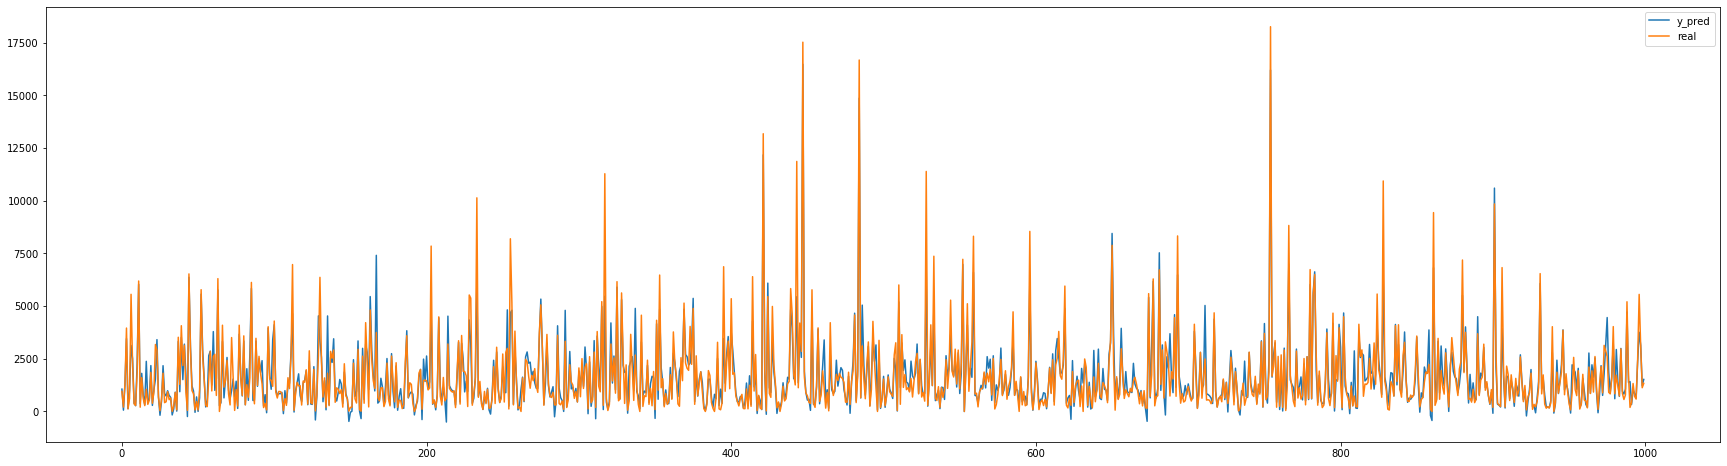

In [67]:
plt.figure(figsize=(30,8))
plt.plot(y_pred[pred_idx], label='y_pred')
plt.plot(train_test_dict['test_y'][pred_idx], label='real')
plt.legend(loc='best')



## Memory issue

In [70]:
xgb_rgr = set_xgb()

xgb_params = {
      'max_depth': [2, 4, 6],
      'n_estimators': [100, 500, 1000],
      'colsample_bytree': [0.2, 0.6, 0.8],
      'min_child_weight': [3, 5, 7],
      'gamma': [0.3, 0.5, 0.7],
      'subsample': [0.4, 0.6, 0.8]
      }

if GPU_USE:
    xgb_params['tree_method'] = ['gpu_hist']
    xgb_params['gpu_id'] = [GPU_ID]
rs_cv = RandomizedSearchCV(estimator=xgb_rgr, param_distributions=xgb_params,scoring = 'neg_mean_absolute_error', 
                           n_iter=25,n_jobs=-1, verbose=1)

rs_cv.fit(train_test_dict['train_x'], train_test_dict['train_y'])
print(rs_cv.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


/nas/scratch/PR/hyunchan.moon/venv/tf21_mhc/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
123 fits failed out of a total of 125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/nas/scratch/PR/hyunchan.moon/venv/tf21_mhc/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/nas/scratch/PR/hyunchan.moon/venv/tf21_mhc/lib/python3.7/site-packages/xgboost/core.py", line 575, in inner_f
    return f(**kwargs)
  File "/nas/scratch/PR/hyunchan.moon/venv/tf21_mhc/lib/python3.7/site-packages/xgboost/sklearn.py", line 972

XGBoostError: [14:17:58] ../src/tree/updater_gpu_hist.cu:712: Exception in gpu_hist: [14:17:58] ../src/c_api/../data/../common/device_helpers.cuh:428: Memory allocation error on worker 0: std::bad_alloc: cudaErrorMemoryAllocation: out of memory
- Free memory: 350355456
- Requested memory: 1001253124

Stack trace:
  [bt] (0) /nas/scratch/PR/hyunchan.moon/venv/tf21_mhc/lib/python3.7/site-packages/xgboost/lib/libxgboost.so(+0x3a5799) [0x15504e4ea799]
  [bt] (1) /nas/scratch/PR/hyunchan.moon/venv/tf21_mhc/lib/python3.7/site-packages/xgboost/lib/libxgboost.so(+0x3a9bab) [0x15504e4eebab]
  [bt] (2) /nas/scratch/PR/hyunchan.moon/venv/tf21_mhc/lib/python3.7/site-packages/xgboost/lib/libxgboost.so(+0x3ea60e) [0x15504e52f60e]
  [bt] (3) /nas/scratch/PR/hyunchan.moon/venv/tf21_mhc/lib/python3.7/site-packages/xgboost/lib/libxgboost.so(+0x406845) [0x15504e54b845]
  [bt] (4) /nas/scratch/PR/hyunchan.moon/venv/tf21_mhc/lib/python3.7/site-packages/xgboost/lib/libxgboost.so(+0x40691e) [0x15504e54b91e]
  [bt] (5) /nas/scratch/PR/hyunchan.moon/venv/tf21_mhc/lib/python3.7/site-packages/xgboost/lib/libxgboost.so(+0x406b3b) [0x15504e54bb3b]
  [bt] (6) /nas/scratch/PR/hyunchan.moon/venv/tf21_mhc/lib/python3.7/site-packages/xgboost/lib/libxgboost.so(+0x428665) [0x15504e56d665]
  [bt] (7) /nas/scratch/PR/hyunchan.moon/venv/tf21_mhc/lib/python3.7/site-packages/xgboost/lib/libxgboost.so(+0x42c393) [0x15504e571393]
  [bt] (8) /nas/scratch/PR/hyunchan.moon/venv/tf21_mhc/lib/python3.7/site-packages/xgboost/lib/libxgboost.so(+0x42c8fe) [0x15504e5718fe]



Stack trace:
  [bt] (0) /nas/scratch/PR/hyunchan.moon/venv/tf21_mhc/lib/python3.7/site-packages/xgboost/lib/libxgboost.so(+0x64dbc9) [0x15504e792bc9]
  [bt] (1) /nas/scratch/PR/hyunchan.moon/venv/tf21_mhc/lib/python3.7/site-packages/xgboost/lib/libxgboost.so(+0x66eef5) [0x15504e7b3ef5]
  [bt] (2) /nas/scratch/PR/hyunchan.moon/venv/tf21_mhc/lib/python3.7/site-packages/xgboost/lib/libxgboost.so(+0x1e8ca3) [0x15504e32dca3]
  [bt] (3) /nas/scratch/PR/hyunchan.moon/venv/tf21_mhc/lib/python3.7/site-packages/xgboost/lib/libxgboost.so(+0x1e9857) [0x15504e32e857]
  [bt] (4) /nas/scratch/PR/hyunchan.moon/venv/tf21_mhc/lib/python3.7/site-packages/xgboost/lib/libxgboost.so(+0x225b72) [0x15504e36ab72]
  [bt] (5) /nas/scratch/PR/hyunchan.moon/venv/tf21_mhc/lib/python3.7/site-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x68) [0x15504e204098]
  [bt] (6) /nas/scratch/PR/hyunchan.moon/venv/tf21_mhc/lib/python3.7/lib-dynload/../../libffi.so.7(+0x69dd) [0x1555523959dd]
  [bt] (7) /nas/scratch/PR/hyunchan.moon/venv/tf21_mhc/lib/python3.7/lib-dynload/../../libffi.so.7(+0x6067) [0x155552395067]
  [bt] (8) /nas/scratch/PR/hyunchan.moon/venv/tf21_mhc/lib/python3.7/lib-dynload/_ctypes.cpython-37m-x86_64-linux-gnu.so(_ctypes_callproc+0x2ce) [0x1555523ad27e]

